In [1]:
import sys
sys.path.insert(1, '/Users') # to bring module from different directory
import _localEnv # local module
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 # processing images
from tqdm import tqdm # progress bar
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd


In [4]:
DATADIR = f'/Users/{_localEnv.user}/workspace/Cat-Dog-Classifier/catsanddogs' # data folder
CATEGORIES = ['Dog', 'Cat'] # sub-folders in data folder
IMAGE_SIZE = 60 # pixels

training_data = []
def create_training_data():
    for category in CATEGORIES: # for each category
        print("category: ",category)
        path = os.path.join(DATADIR, category) # path to cat or dog folder
        print("path: ",path)
        class_num = CATEGORIES.index(category) # class label is based on the index (0 or 1)
        print("class number: ",class_num)
        print(f"iterating in {path}")
        for img_name in tqdm(os.listdir(path)): # iterate over all images within each category directory
            try:
                #print("img name: ",img_name)
                img_file = os.path.join(path, img_name) # path to each image
                img_arr = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE) # convert image to array in gray scale
                resized_img_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE)) # resize width x height
                #print("img_file: ",img_file)
                #print("-------")
                training_data.append([resized_img_arr, class_num]) # add a list containing the features and its label to a bigger list of all samples
            except Exception as e:
                #print(e)
                pass
            
create_training_data() # call function

  0%|          | 35/12501 [00:00<00:36, 345.59it/s]

category:  Dog
path:  /Users/rezanaghshineh/workspace/Cat-Dog-Classifier/catsanddogs/Dog
class number:  0
iterating in /Users/rezanaghshineh/workspace/Cat-Dog-Classifier/catsanddogs/Dog


  0%|          | 52/12501 [00:00<00:24, 516.72it/s]

category:  Cat
path:  /Users/rezanaghshineh/workspace/Cat-Dog-Classifier/catsanddogs/Cat
class number:  1
iterating in /Users/rezanaghshineh/workspace/Cat-Dog-Classifier/catsanddogs/Cat


100%|██████████| 12501/12501 [00:22<00:00, 557.09it/s]


In [5]:
random.shuffle(training_data) # shuffle data

X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X) # must be np array
X = X.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1) # -1 is all, then by the dimensions of each image, and the last 1 is for gray scale. if it was rgb, then use 3
X = X / 255.0 # normalize

y = np.array(y) # must be np array

X[0].shape # each image is 60x60 by 1 gray color

(60, 60, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # train/test split

model = Sequential()
# input layer
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:], activation="relu")) # convolution layer: 64 neurons, 3x3 conv window & input shape 60x60x1
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling layer: 2x2 pooling window

# layer 2
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model.add(Flatten()) # Convert 3D Feature to 1D before Dense layer
model.add(Dense(64))

# output layer
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics = ['accuracy'] )

Train on 17462 samples, validate on 7484 samples
Epoch 1/5
17462/17462 [==============================] - 144s 8ms/sample - loss: 0.6497 - accuracy: 0.6219 - val_loss: 0.5661 - val_accuracy: 0.7092
Epoch 2/5
17462/17462 [==============================] - 127s 7ms/sample - loss: 0.5639 - accuracy: 0.7106 - val_loss: 0.5274 - val_accuracy: 0.7402
Epoch 3/5
17462/17462 [==============================] - 129s 7ms/sample - loss: 0.5096 - accuracy: 0.7517 - val_loss: 0.5140 - val_accuracy: 0.7493
Epoch 4/5
17462/17462 [==============================] - 135s 8ms/sample - loss: 0.4758 - accuracy: 0.7758 - val_loss: 0.5144 - val_accuracy: 0.7465
Epoch 5/5
17462/17462 [==============================] - 127s 7ms/sample - loss: 0.4414 - accuracy: 0.7985 - val_loss: 0.5017 - val_accuracy: 0.7606


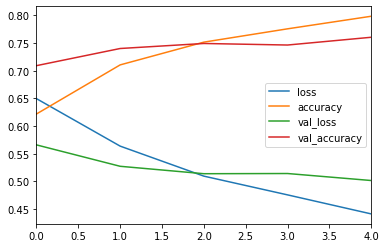

In [10]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

table = pd.DataFrame(model.history.history)
table.plot()